In [27]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
subjects = {}
subjectslist = ['Subject2','Subject3','Subject4','Subject7','Subject8','Subject9','Subject10','Subject11','Subject12']
for n in subjectslist:
    file = n + '.pkl'
    fileopen = open(file, 'rb')
    subjects[n] = pickle.load(fileopen)
    fileopen.close()
    trialnames = list(set(subjects[n].keys()))

In [28]:
trials = ['FACTORY','X0','X50','X100','X150','X300']
paramnames = [x for x in subjects[subjectslist[0]][trials[0]] if type(subjects[subjectslist[0]][trials[0]][x]) is float]
for subject in subjectslist:
    for trial in trials:
        if not subjects[subject][trial]:
            subjectslist.remove(subject)
            print('WARNING: %s has no trial for %s, subject has been removed from analysis.' %(subject,trial))
print('Number parameters:')
print(sorted(paramnames))
vectornames = [x for x in subjects[subjectslist[0]][trials[0]] if type(subjects[subjectslist[0]][trials[0]][x]) is not float]
print('Vector parameters:')
print(sorted(vectornames))

Number parameters:
['LeftFoffFraction', 'LeftSpeed', 'LeftSpeedCalc', 'LeftStepLen', 'LeftStepTime', 'LeftStrideLen', 'RightFoffFraction', 'RightSpeed', 'RightSpeedCalc', 'RightStepLen', 'RightStepTime', 'RightStrideLen']
Vector parameters:
['AffectedSide', 'Frames', 'LANKX', 'LANKY', 'LANKZ', 'LASIX', 'LASIY', 'LASIZ', 'LAbsAnkleAngleX', 'LAbsAnkleAngleY', 'LAbsAnkleAngleZ', 'LAnkleAnglesX', 'LAnkleAnglesY', 'LAnkleAnglesZ', 'LFootProgressAnglesX', 'LFootProgressAnglesY', 'LFootProgressAnglesZ', 'LHEEX', 'LHEEY', 'LHEEZ', 'LHipAnglesX', 'LHipAnglesY', 'LHipAnglesZ', 'LKNEX', 'LKNEY', 'LKNEZ', 'LKneeAnglesX', 'LKneeAnglesY', 'LKneeAnglesZ', 'LPSIX', 'LPSIY', 'LPSIZ', 'LPelvisAnglesX', 'LPelvisAnglesY', 'LPelvisAnglesZ', 'LTHIX', 'LTHIY', 'LTHIZ', 'LTIBX', 'LTIBY', 'LTIBZ', 'LTOEX', 'LTOEY', 'LTOEZ', 'LeftAnkleAngle', 'RANKX', 'RANKY', 'RANKZ', 'RASIX', 'RASIY', 'RASIZ', 'RAbsAnkleAngleX', 'RAbsAnkleAngleY', 'RAbsAnkleAngleZ', 'RAnkleAnglesX', 'RAnkleAnglesY', 'RAnkleAnglesZ', 'RFootPro

In [29]:
for subject in subjectslist:
    for trial in trials:
        for side in ['Left','Right']:
            try:
                toe = subjects[subject][trial][side+'ToeZ']
                subjects[subject][trial][side+'MaxtoeZ'] = max(toe[int(len(toe)*0.2):int(len(toe)*0.8)]) - min(toe)
                subjects[subject][trial][side+'MintoeZ'] = min(toe[int(len(toe)*0.2):int(len(toe)*0.8)]) - min(toe)
            except KeyError:
                continue

dict_keys(['LKneeAnglesZ', 'RAbsAnkleAngleY', 'Frames', 'LTIBZ', 'RKNEX', 'RASIX', 'LAnkleAnglesZ', 'LeftStrideLen', 'RightStepLen', 'LKNEZ', 'LeftStepTime', 'LTIBX', 'LASIZ', 'LAnkleAnglesX', 'RHipAnglesX', 'LHEEX', 'RTOEY', 'LPelvisAnglesZ', 'LANKZ', 'RPelvisAnglesY', 'LeftStepLen', 'RightSpeed', 'RHipAnglesZ', 'RAbsAnkleAngleZ', 'LHipAnglesY', 'LHEEY', 'LFootProgressAnglesZ', 'RightStepTime', 'LeftSpeedCalc', 'LTOEZ', 'RKNEY', 'LASIX', 'RKneeAnglesY', 'RPSIX', 'RHEEX', 'RKneeAnglesZ', 'LPSIZ', 'RANKX', 'RTHIX', 'RHipAnglesY', 'LAbsAnkleAngleY', 'RANKZ', 'LHipAnglesX', 'LKneeAnglesY', 'RPelvisAnglesX', 'RPSIZ', 'LFootProgressAnglesY', 'RFootProgressAnglesZ', 'LPSIX', 'RTIBX', 'LTOEY', 'LAbsAnkleAngleX', 'RAbsAnkleAngleX', 'LTOEX', 'LPelvisAnglesY', 'LTIBY', 'LKneeAnglesX', 'LPSIY', 'RAnkleAnglesY', 'RFootProgressAnglesX', 'LAbsAnkleAngleZ', 'LPelvisAnglesX', 'RightAnkleAngle', 'RightSpeedCalc', 'RTHIZ', 'LTHIZ', 'LeftAnkleAngle', 'AffectedSide', 'RANKY', 'RASIY', 'RKNEZ', 'LAnkleAngl

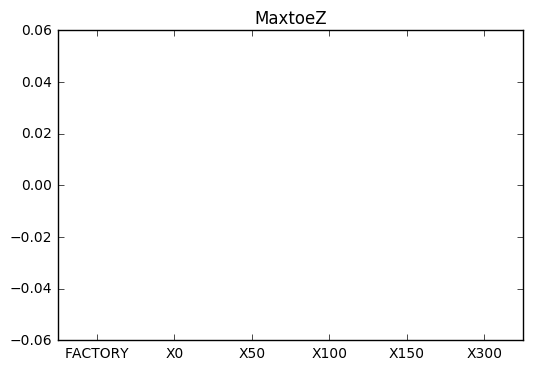

In [40]:
analysis = 'MaxtoeZ'
data = [[] for _ in range(len(trials))]
for subjectnum in range(len(subjectslist)):
    subject = subjectslist[subjectnum]
    fesside = subjects[subject][trials[0]]['AffectedSide']
    for trialnum in range(len(trials)):
        print(subjects[subject][trial].keys())
        try:
            trial = trials[trialnum]
            data[trialnum].append(subjects[subject][trial][fesside+analysis])
        except KeyError:
            continue

print(data)
%matplotlib inline
box = plt.boxplot(data, labels=trials)
plt.title(analysis)

In [37]:
# make list of lists: lists 1->len(subjectslist) for trial 1, next set for trial 2, etc.
vector = 'ANKZ'
array = [[] for _ in range(len(subjectslist)*len(trials))]
for subjectnum in range(len(subjectslist)):
    subject = subjectslist[subjectnum]
    fesside = ('R') if subjects[subject][trials[0]]['AffectedSide']=='Right' else ('L')
    for trialnum in range(len(trials)):
        trial = trials[trialnum]
        array[subjectnum+(trialnum*len(subjectslist))] = subjects[subject][trial][fesside+vector]

# arraycleaner
shortest = len(min(array,key=len))
for n in range(len(array)):
    line = array[n]
    if len(array[n]) != shortest:
        this = len(line)
        cut = np.ceil(1/((this/shortest) - 1))
        #import pdb; pdb.set_trace()
        for m in range(len(array[n])):
            if m % cut == 0 and m != 0:
                line[m] = 'del'
        for m in range(len(array[n])):
            try:
                if line[m] == 'del':
                    line.pop(m)
            except IndexError:
                continue
        array[n] = line[0:shortest]
for n in range(len(array)):
    print(len(array[n]))

# average subjects in each trial
avg_per_trial = [[] for _ in range(len(trials))]
for trialnum in range(len(trials)):
    trial = trials[trialnum]
    for n in range(len(array[0])):
        trialpoint = [array[x+trialnum*len(subjectslist)][n] for x in range(len(subjectslist))]
        avg_per_trial[trialnum].append(sum(trialpoint)/len(trialpoint))

# plot it
lgnd = [0]*len(trials)
for trialnum in range(len(trials)):
    plt.plot(avg_per_trial[trialnum], label=trials[trialnum])
plt.legend()

16
15
15
15
15
9
15
10
15
15
15
15
16
10
15
11
16
15
15
15
10
9
15
12
9
15
15
15
9
9
15
10
9
15
15
15
15
9
15
11
9
15
15
15
15
16
15
10


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [36]:
debug

> <ipython-input-35-3001ad24210f>(36)<module>()
     34     for n in range(len(array[0])):
     35         trialpoint = [array[x+trialnum*len(subjectslist)][n] for x in range(len(subjectslist))]
---> 36         avg_per_trial[trialnum].append(sum(trialpoint)/len(trialpoint))
     37 
     38 # plot it

ipdb> array
[[115.496, 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del', 'del'], [77.726, 76.6305, 75.6081, 76.8985, 77.3066, 77.1862, 77.1281, 77.1912, 77.6803, 78.5837, 79.6314, 80.7182, 81.8885, 84.9453, 89.9132, 99.4853, 118.033, 159.76, 196.228, 229.74, 214.925, 182.062, 131.21, 112.002, 107.286, 111.794, 110.665, 98.5832], [101.006, 100.774, 100.274, 100.057, 99.7518, 99.5433, 99.538, 99.7485, 100.179, 100.852, 101.161, 101.465, 102.534, 106.442, 118.512, 135.203, 156.79, 168.067, 169.711, 161.838, 150.992, 138.291, 129.217, 121.703